<a href="https://colab.research.google.com/github/plance17/Redes-Neuronales-UNSAM/blob/main/Rede_Neuronales_Gu%C3%ADa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\dot{v}=0.04v^2+5v+140-u+I
\\
\dot{u}=a(bv-u)
$$
\
con un reseteo auxiliar
\
$$
v(t) \leftarrow c
\\
u(t) \leftarrow u(t)+d
$$
\
cuando $v(t)>30mV$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import sys
from scipy.integrate import odeint


In [ ]:
a=0.02
b=0.2
c=-65
d=8
I=10

def du_dt(u, v,a,b):
    return a*(b*v-u)

def dv_dt(u, v):
    return 0.04*v**2+5*v+140-u+I

def ode(P,t):   #P[0]=u    P[1]=v
    return [a*(b*P[0]-P[1]) , 0.04*P[1]**2+5*P[1]+140-P[0]+I]

ts = np.linspace(0,0.05, 200)

u0=0
v0=0
P0=[u0,v0]

Ps=odeint(ode, P0, ts)

us=[]
vs=[]
tsf=[]
o=0
ts0=0
while ts[len(ts)-1]<0.1:
  ts=np.linspace(t_sol,t_sol+0.08, 200)
  Ps=odeint(ode, P0, ts)
  for i in np.arange(0,len(ts)):
    if Ps[i,1]<=30:
      us.append(Ps[i,0])
      vs.append(Ps[i,1])
      tsf.append(t_sol)
    if Ps[i,1]>30:
      us.append(us[i-1]+d)
      vs.append(c)
      P0=[us[len(us)-1],vs[len(vs)-1]]
      break
    o=o+1
  


print(us)
plt.xlabel("time")
plt.ylabel("u")
#plt.plot(ts,xs2,'bo',label='x')
#plt.plot(ts,ys2,'ro',label='y')
plt.plot(tsf,us,'ro',label='y')
plt.show()



KeyboardInterrupt: ignored

In [ ]:
a=0.02
b=0.2
c=-65
d=4
I=10

def du_dt(u, v,a,b):
    return a*(b*v-u)

def dv_dt(u, v):
    return 0.04*v**2+5*v+140-u+I

def ode(P,t):   #P[0]=u    P[1]=v
    return [a*(b*P[1]-P[0]) , 0.04*P[1]**2+5*P[1]+140-P[0]+I]

ts = np.linspace(0,100, 1000)


v0=-65
u0=b*v0
P0=[u0,v0]

us=[]
vs=[]
tsf=[]
o=0
ts0=0
t_sol=0

a=0
Ps=odeint(ode, P0, ts)
for i in np.arange(0,len(ts)-1):
  if Ps[i,1]<=30:
    us.append(Ps[i,0])
    vs.append(Ps[i,1])
    #tsf.append(ts[i])
  if Ps[i,1]>30:
    us.append(us[i-1]+d)
    vs.append(c)
    P0=[us[i],vs[i]]
    a=i
    Ps=odeint(ode, P0, ts[a:len(ts)-1])


print(us)


plt.xlabel("time")
plt.ylabel("u")
plt.plot(ts[0:len(ts)-1],us,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(ts[0:len(ts)-1],vs,'ro',label='y')
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


IndexError: ignored

In [ ]:
#Neuronas exitatorias
Ne=800
#Neuronas Inhibitorias
Ni=200

a=0.02
b=0.2


#**Por método de Runge-Kutta 4**

**RS**

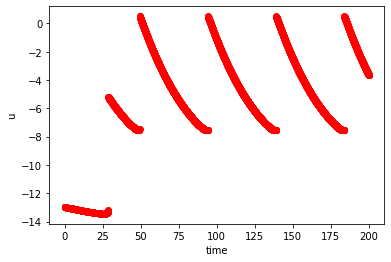

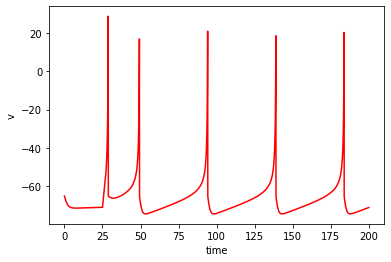

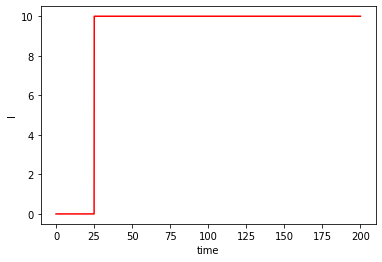

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v


a=0.02
b=0.2
c=-65
d=8

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>500:
    I[i]=10


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**IB**

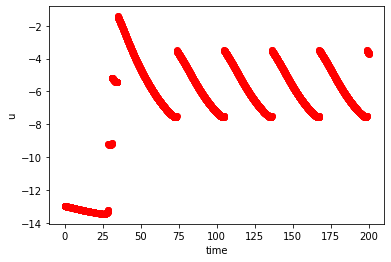

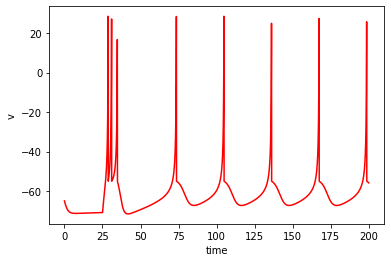

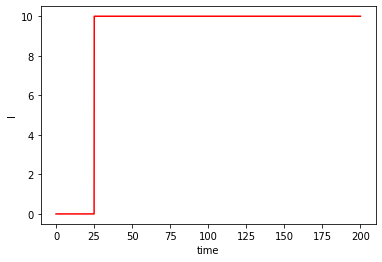

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v


a=0.02
b=0.2
c=-55
d=4

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>500:
    I[i]=10


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**CH**

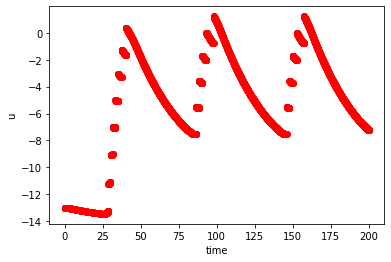

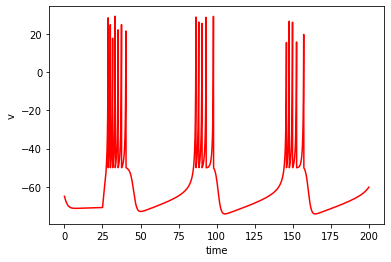

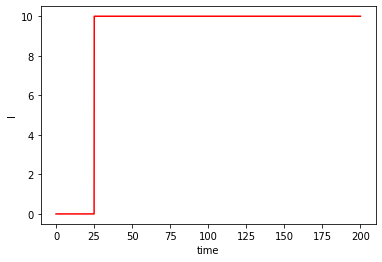

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v


a=0.02
b=0.2
c=-50
d=2

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>500:
    I[i]=10


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**FS**

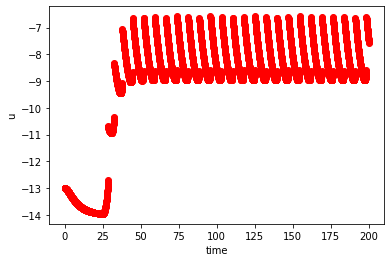

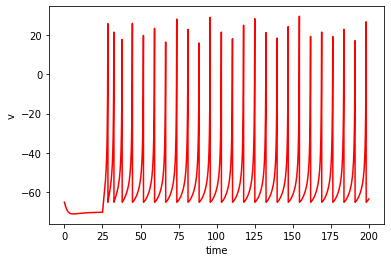

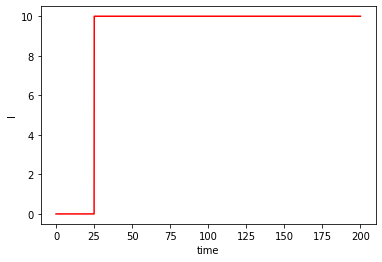

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v



a=0.1
b=0.2
c=-65
d=2

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>500:
    I[i]=10


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**TC**

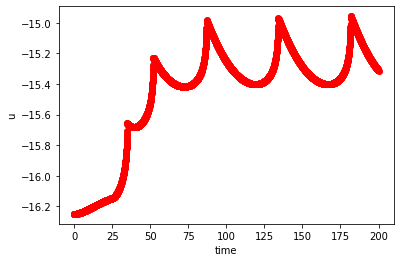

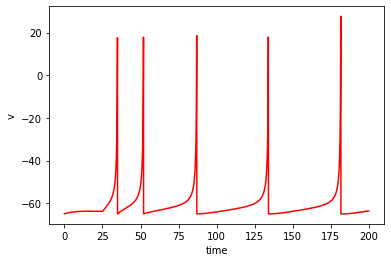

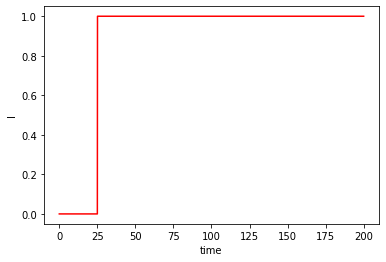

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v


a=0.02
b=0.25
c=-65
d=0.05

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>500:
    I[i]=1


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**TC**

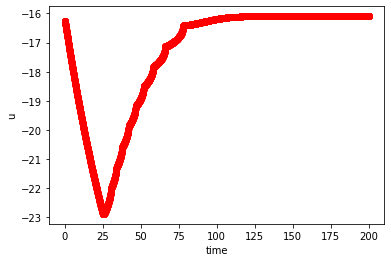

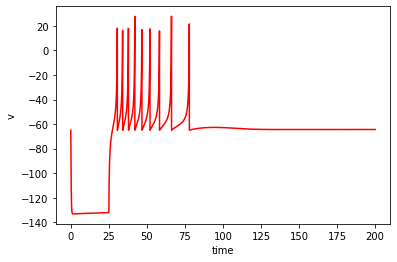

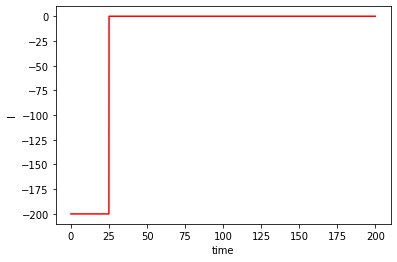

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v


a=0.02
b=0.25
c=-65
d=0.05

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i<500:
    I[i]=-200


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



**RZ**

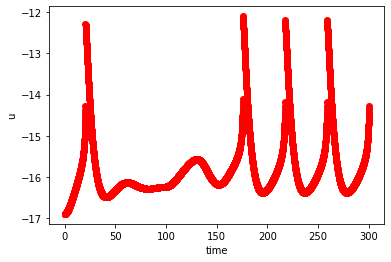

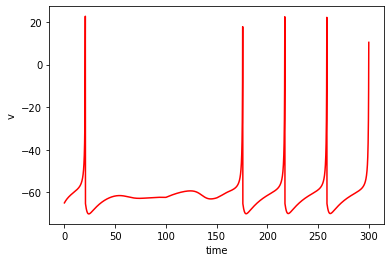

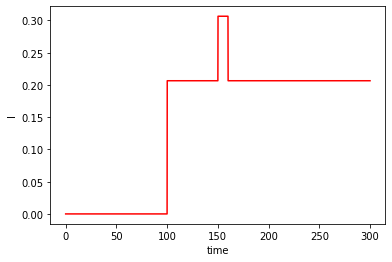

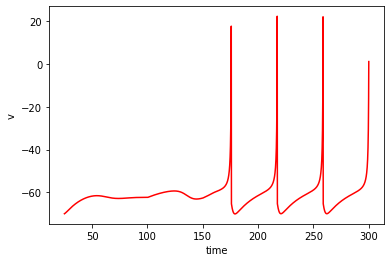

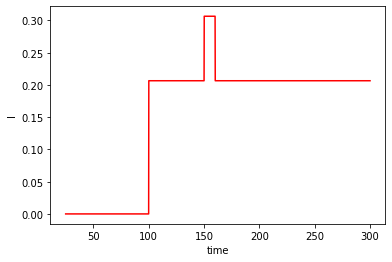

In [ ]:

h=0.05
dt=h


tiempo_total=300

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v

a=0.1
b=0.26
c=-65
d=2

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

par=0.2065
for i in np.arange(0,int(m)):
  if i>=2000:
    I[i]=par
  if i>3000 and i<3200:
    I[i]=par+0.1


for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()


t2=[]
I2=[]
v2=[]

for i in np.arange(0,int(m-1)):
  if t[i]>25:
    t2.append(t[i])
    I2.append(I[i])
    v2.append(v[i])

plt.xlabel("time")
plt.ylabel("v")
plt.plot(t2,v2,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t2,I2,'red',label='y')
plt.show()


**LTS**

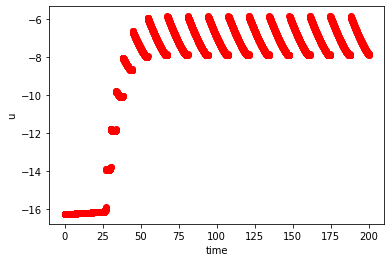

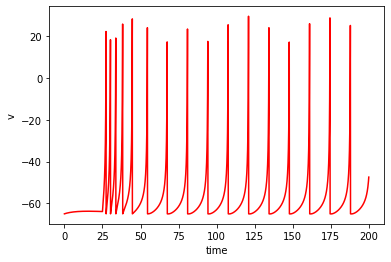

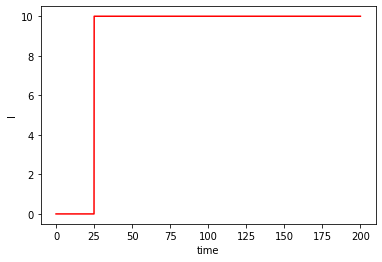

In [ ]:

h=0.05
dt=h


tiempo_total=200

m=tiempo_total/h

t=np.linspace(0,tiempo_total,int(m))


def f(u,v,a,b):
  u=a*(b*v-u)
  return u

def g(u,v,I):
  v=0.04*v**2+5*v+140-u+I
  return v

a=0.02
b=0.25
c=-65
d=2

v0=-65
u0=b*v0
P0=[u0,v0]



I=np.zeros(int(m))

vu=30

u=np.zeros(int(m))
v=np.zeros(int(m))

v0=-65
u0=b*v0

u[0]=u0
v[0]=v0

for i in np.arange(0,int(m)):
  if i>=500:
    I[i]=10



for i in np.arange(0,int(m-1)):
  k1 = f(u[i],v[i],a,b)
  l1 = g(u[i],v[i],I[i])

  k2 = f(u[i]+0.5*h*k1,v[i]+0.5*h*l1,a,b)
  l2 = g(u[i]+0.5*h*k1,v[i]+0.5*h*l1,I[i])

  k3 = f(u[i]+0.5*h*k2,v[i]+0.5*h*l2,a,b)
  l3 = g(u[i]+0.5*h*k2,v[i]+0.5*h*l2,I[i])

  k4 = f(u[i]+h*k3,v[i]+h*l3,a,b)
  l4 = g(u[i]+h*k3,v[i]+h*l3,I[i])



  u[i+1]=u[i]+h*(k1+2.0*k2+2.0*k3+k4)/6.0
  v[i+1]=v[i]+h*(l1+2.0*l2+2.0*l3+l4)/6.0

  if v[i+1]>vu:
    u[i+1]=u[i]+d
    v[i+1]=c

plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,'ro',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("v")
plt.plot(t,v,'red',label='y')
plt.show()


plt.xlabel("time")
plt.ylabel("I")
plt.plot(t,I,'red',label='y')
plt.show()



In [ ]:
np.random.rand()

0.7455639165565965